In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('C:/Users/Hamza Zaib/Downloads')

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(['Embarked' , 'Cabin' , 'Ticket' , 'Parch' , 'SibSp' , 'Name' , 'PassengerId'  ] , axis=1 , inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [8]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [9]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [11]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [15]:
len(X_train)

712

In [16]:
len(X_test)

179

In [17]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
model.score(X_test,y_test)

0.7486033519553073

In [29]:
model.predict([[3 ,1 ,35.0 ,8.0500]])

array([0], dtype=int64)

In [23]:
gini = tree.DecisionTreeClassifier(random_state=0, criterion='gini')
gini.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
gini.score(X_test,y_test)

0.7597765363128491

In [26]:
entropy = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
entropy.score(X_test,y_test)

0.7653631284916201

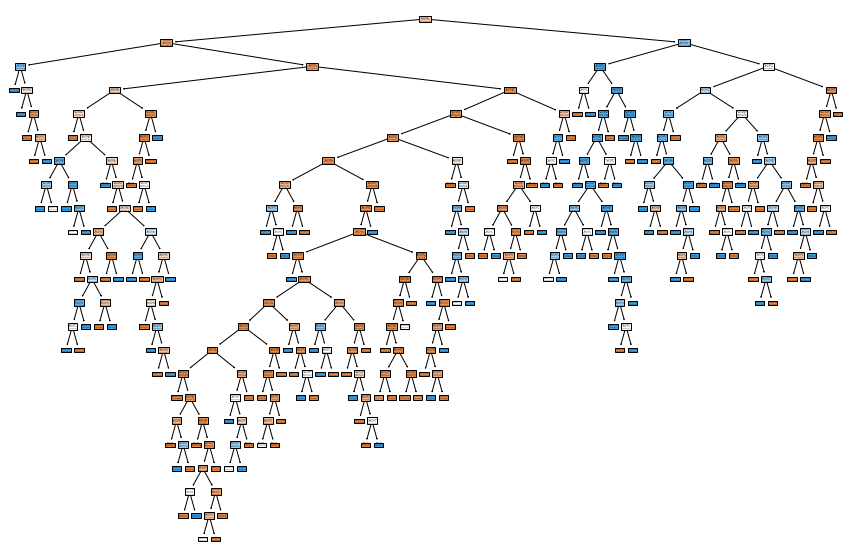

In [31]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()